# Import libraries

In [2]:
import sys
myFunctionsFolder = "C:\\Users\\u5040252\\CloudStation\\Dropbox\\data Vincent\\Python\\myFunctions\\"
if not  myFunctionsFolder in sys.path:
    sys.path.append(myFunctionsFolder)
    


    
# from denoising import denoise_df, rolling_linear_reg, myround
from MyGraphs import *
import pandas as pd
import time
import os
import glob
from  collections import *

% matplotlib qt

# folders and variables

In [80]:
datafolder = "C:\\Users\\U5040252\\Cloudstation\\Projects\\Mass_Spec_Data\\2016\\"
pattern = '20160525'  #date pattern. Examples: '2016', '201601', '20160331'

# Extract values from graphs

In [81]:
day = pattern
samplefile = os.path.join(datafolder, day, "".join(["_", day,"_SAMPLE_cleaned.csv"]))
samplefile

'C:\\Users\\U5040252\\Cloudstation\\Projects\\Mass_Spec_Data\\2016\\20160525\\_20160525_SAMPLE_cleaned.csv'

In [82]:
if os.path.isfile(samplefile):
    samples = pd.read_csv(samplefile)

In [87]:
out = pd.DataFrame(columns=['file','nc,','inj_peak','dark1_steady', 'light_high', 'light_low', 'light_steady', 'dark2_high', 'dark2_low'])

if not os.path.isfile(os.path.join(datafolder, day,'results')):
    os.makedirs(os.path.join(datafolder, day,'results'))
    
for f in list(samples.datafile):
#     print(f)
    
    df = pd.read_csv(f, encoding='ISO-8859-1')
    
    
    for _, r in df.loc[df.eventtype.notnull(), ['time', 'eventtype']].iterrows():
        if r['eventtype'] == 'CELLS':
            
            # non catalytic = just before cell injection
            nc = df.loc[(df.time >= (r['time']-10)) & (df.time< r['time']-3), 'enrichrate49'].mean()
            
            # inection_peak = minimum for 100 seconds after injection
            inj_peak = df.loc[(df.time >= (r['time'])) & (df.time < r['time']+100), 'enrichrate49'].min()
            
            
        elif r['eventtype'] == 'LIGHT ON':
            # steady rate in the dark before light on
            dark1_steady = df.loc[(df.time >= (r['time']-10)) & (df.time< r['time']-3), 'enrichrate49'].mean()
            
            light_on = r['time']
        elif r['eventtype'] == 'LIGHT OFF':
            # peaks at light rate in the dark before light on
            light_high = df.loc[(df.time >= light_on) & (df.time< r['time']-3), 'enrichrate49'].max()
            light_low = df.loc[(df.time >= light_on) & (df.time< r['time']-3), 'enrichrate49'].min()
            light_steady = df.loc[(df.time >= r['time']-10) & (df.time< r['time']-3), 'enrichrate49'].mean()
            dark2_high = df.loc[(df.time >= r['time']) & (df.time< r['time']+150), 'enrichrate49'].min()
            dark2_low = df.loc[(df.time >= r['time']) & (df.time< r['time']+150), 'enrichrate49'].min()
    newrow=[os.path.split(f)[-1], nc, inj_peak, dark1_steady, light_high, light_low,light_steady, dark2_high, dark2_low]
    out.loc[len(out.index),:] = newrow
#     print('\n', os.path.split(f)[-1])
#     print(' > nc=',nc)
#     print(' > inj_peak=',inj_peak)
#     print(' > dark_steady=',dark1_steady)
#     print(' > light_high=',light_high)
#     print(' > light_low=',light_low)
#     print(' > dark2_high=',dark2_high)
#     print(' > dark2_low=',dark2_low)

out.to_csv(os.path.join(datafolder, day,'results', 'peak_data.csv'))
        

In [40]:
#non catalytic
datafolder = "C:\\Users\\U5040252\\Cloudstation\\Projects\\Mass_Spec_Data\\2016\\20160427\\"
filename = '20160427_ph78_NC.csv'
%matplotlib inline

df = pd.read_csv(os.path.join(datafolder, filename), encoding='ISO-8859-1')

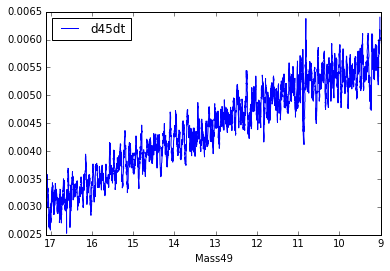

In [54]:
df.ix[1500:,:].plot(x='Mass49', y='d45dt')

In [72]:
from scipy import stats
import numpy as np
df2 = df.loc[df.d45dt.notnull() & (df.time > 150),:]

slope, intercept, r_value, p_value, std_err = stats.linregress(np.array(df2.Mass49),np.array(df2.d45dt))
slope, intercept, r_value, p_value, std_err

(-0.00032065064737298949,
 0.0086033291207768536,
 -0.95390425100256337,
 0.0,
 1.2582631554933897e-06)

In [67]:
np.random.random(10)

array([ 0.85266931,  0.15143978,  0.6676604 ,  0.45694881,  0.67501097,
        0.18086245,  0.30921397,  0.6733151 ,  0.66549419,  0.75891658])

In [63]:
np.array(df.Mass49)

array([ -6.16885152e-04,  -2.10003456e-04,  -4.14756826e-03, ...,
         8.98841042e+00,   8.99156047e+00,   8.98724228e+00])

In [68]:
np.array(df.ix[1500:,'d45dt'])

array([ 0.00284327,  0.00286255,  0.00287444, ...,         nan,
               nan,         nan])

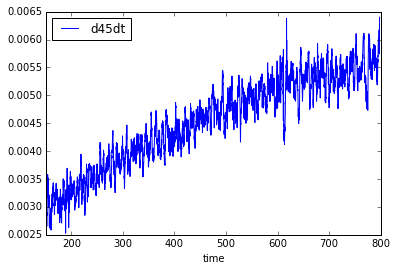

In [65]:
np.array(df.loc[df.d45dt.notnull(),'d45dt'])